In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
sales = pd.read_csv('vgsales.csv')

In [3]:
sales.dropna(inplace = True)
# deleting NAN rows

In [4]:
sales.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [5]:
sales.Year = pd.to_datetime(sales.Year.astype('int64'), format = '%Y')
sales.Year = sales.Year.dt.year
# converting column year to datetime object

### Global Sales Across Different Platforms 

In [6]:
gs_by_platform = sales.groupby('Platform').sum()['Global_Sales']

In [7]:
gs_by_platform = gs_by_platform.sort_values(ascending = False)

Text(0.5, 1.0, 'Accumulated Global Sales Across Different Platforms')

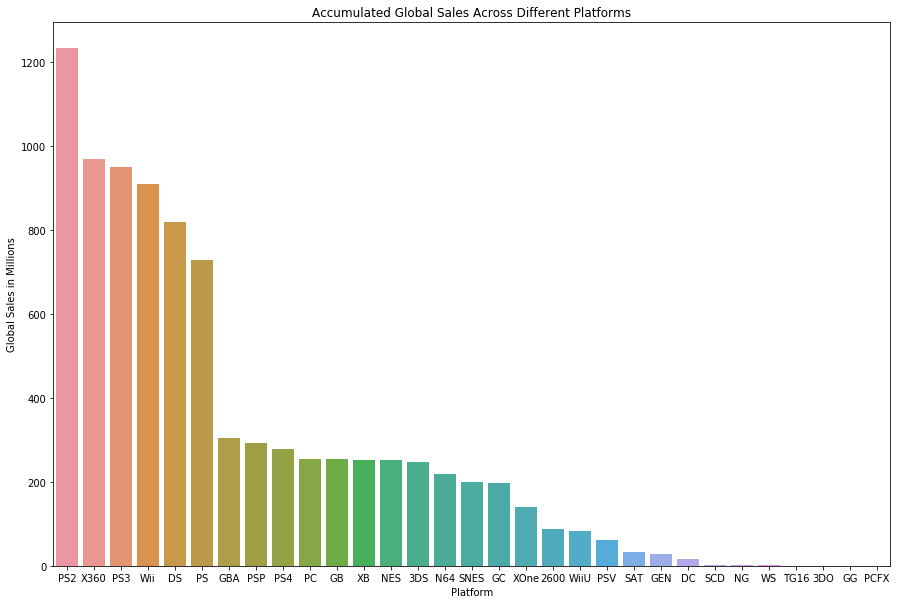

In [8]:
plt.figure(figsize = (15,10))
sns.barplot(gs_by_platform.index, gs_by_platform.values)
plt.ylabel('Global Sales in Millions')
plt.title('Accumulated Global Sales Across Different Platforms')

### Global Sales by Genre 

In [9]:
gs_by_genre = sales.groupby('Genre').sum()['Global_Sales']

In [10]:
gs_by_genre = gs_by_genre.sort_values(ascending = False)

Text(0.5, 1.0, 'Accumulated Global Sales Across Different Game Genres')

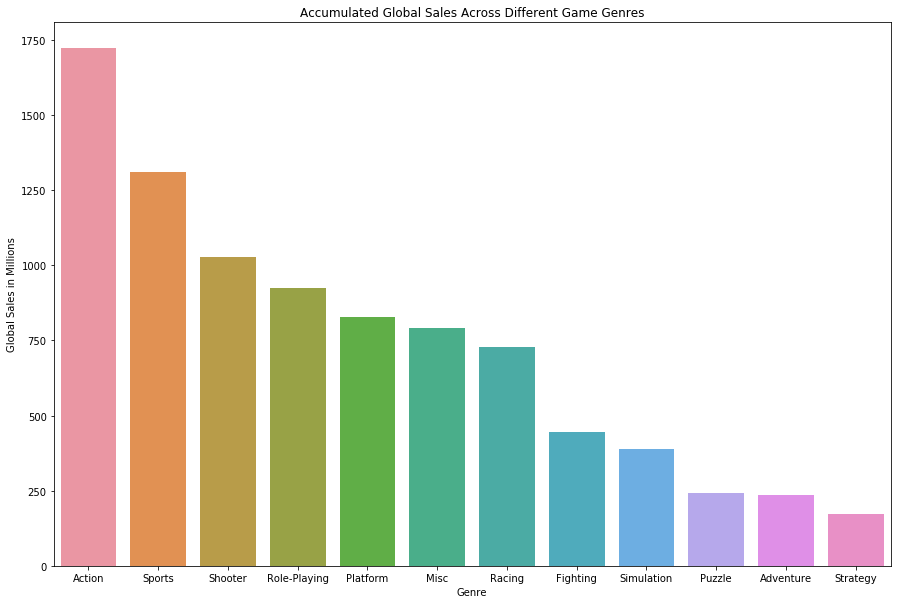

In [11]:
plt.figure(figsize = (15,10))
sns.barplot(gs_by_genre.index, gs_by_genre.values)
plt.ylabel('Global Sales in Millions')
plt.title('Accumulated Global Sales Across Different Game Genres')

### Global Sales by Genre and Publisher

In [12]:
gs_by_publisher = sales.groupby(sales.Publisher).sum()['Global_Sales']

In [13]:
gs_by_publisher = gs_by_publisher.sort_values(ascending = False)[:15]

In [14]:
gs_by_publisher.index

Index(['Nintendo', 'Electronic Arts', 'Activision',
       'Sony Computer Entertainment', 'Ubisoft', 'Take-Two Interactive', 'THQ',
       'Konami Digital Entertainment', 'Sega', 'Namco Bandai Games',
       'Microsoft Game Studios', 'Capcom', 'Atari', 'Square Enix',
       'Warner Bros. Interactive Entertainment'],
      dtype='object', name='Publisher')

In [15]:
pub_sales = sales[sales.Publisher.isin(['Nintendo', 'Electronic Arts', 'Activision',
       'Sony Computer Entertainment', 'Ubisoft', 'Take-Two Interactive', 'THQ',
       'Konami Digital Entertainment', 'Sega', 'Namco Bandai Games',
       'Microsoft Game Studios', 'Capcom', 'Atari', 'Square Enix',
       'Warner Bros. Interactive Entertainment'])]

In [16]:
pub_sales.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [17]:
pub_sales = pub_sales.pivot_table(values = 'Global_Sales', index = 'Publisher', columns = 'Genre', aggfunc = 'sum')

In [18]:
pub_sales.fillna(0, inplace = True)

In [19]:
pub_sales.head()

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Publisher,,,,,,,,,,,,
Activision,141.82,5.42,2.86,76.55,33.40,1.06,16.99,46.79,295.40,8.26,75.16,17.70
Atari,23.91,2.26,25.98,7.21,7.45,20.77,10.93,8.07,19.18,4.88,12.26,3.87
Capcom,85.16,10.25,32.88,1.94,22.62,0.71,2.38,31.97,11.13,0.15,0.46,0.30
Electronic Arts,115.34,4.75,30.85,19.74,6.53,4.55,145.77,35.30,158.26,89.53,468.69,14.08
Konami Digital Entertainment,69.70,7.18,1.73,18.36,14.83,0.83,1.27,13.74,9.47,32.31,98.15,10.99


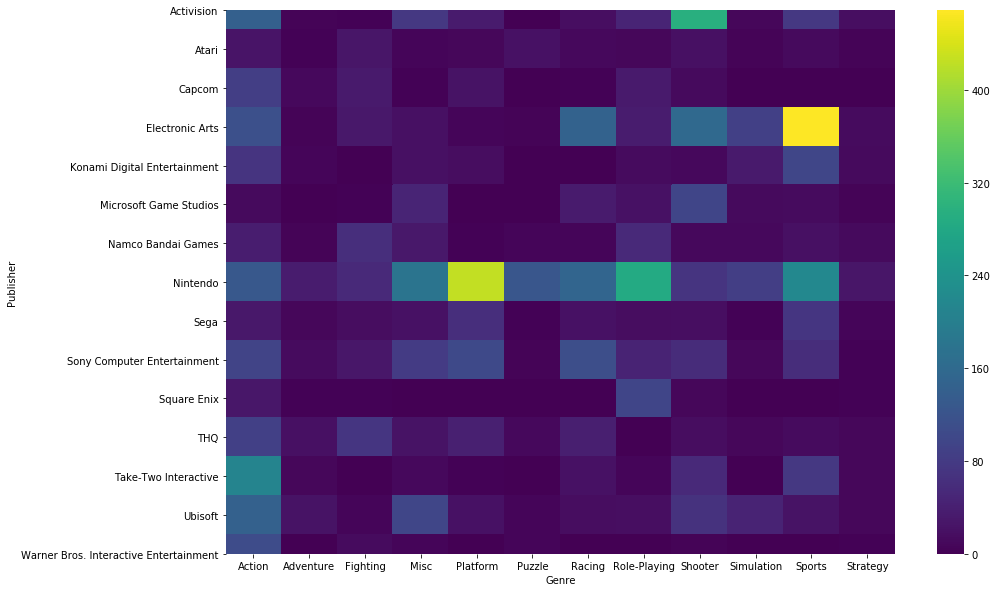

In [20]:
plt.figure(figsize = (15, 10))
color = plt.cm.get_cmap()
sns.heatmap(pub_sales, cmap = color)

### Correlation between Regional & Global Sales

[(0, 4),
 Text(0, 0.5, 'Other Sales'),
 (0, 8),
 Text(0.5, 0, 'JP Sales'),
 Text(0.5, 1.0, 'JP vs Other')]

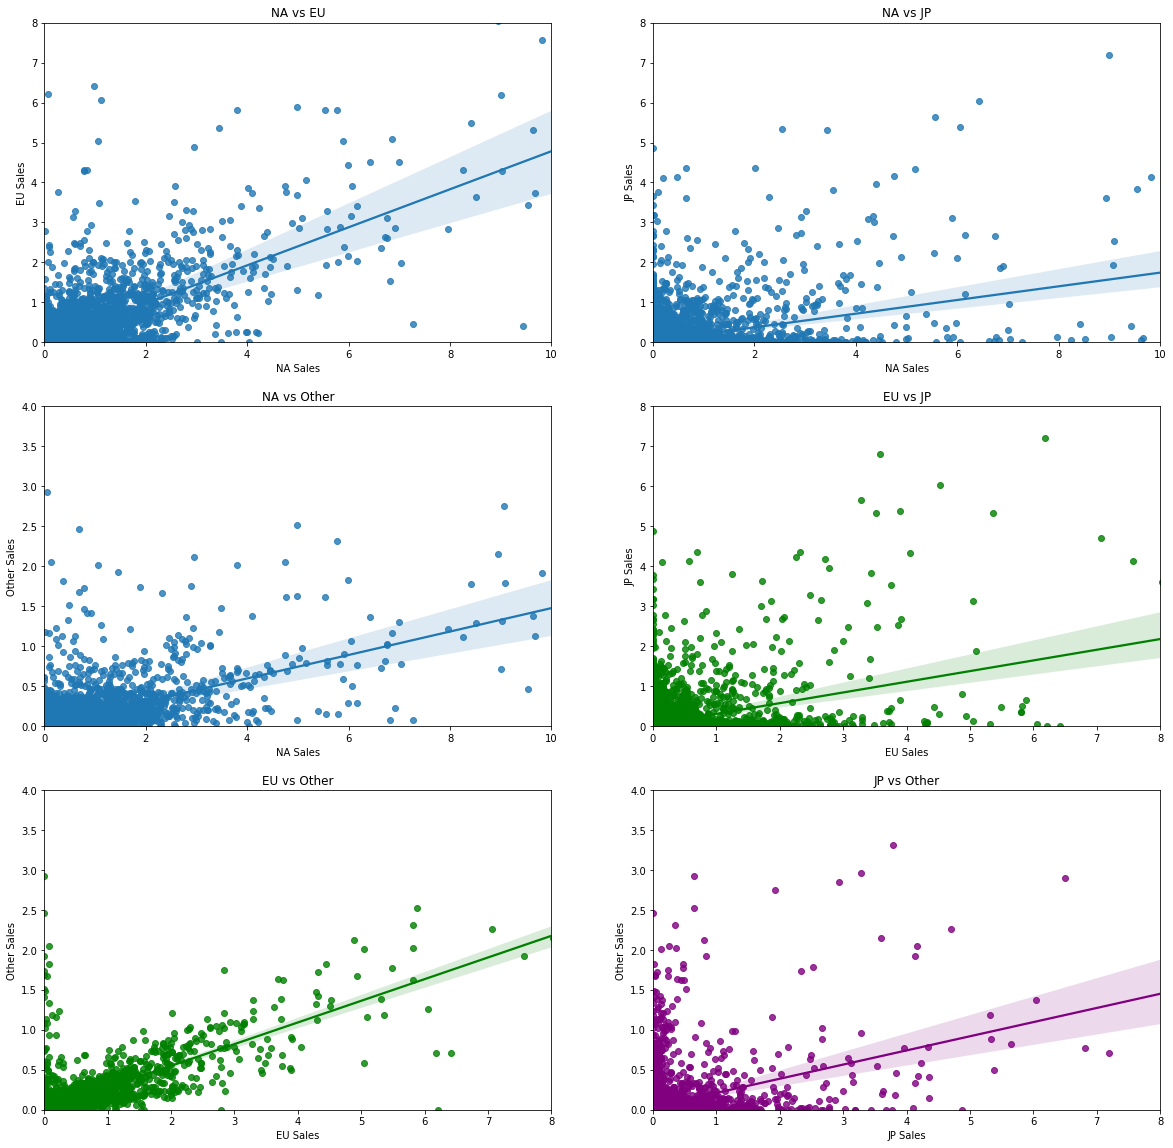

In [21]:
fig = plt.figure(figsize = (20, 20))
axes1 = fig.add_subplot(3, 2, 1)
sns.regplot(sales.NA_Sales, sales.EU_Sales, ax = axes1)
axes1.set(**{
    'title': 'NA vs EU',
    'xlabel': 'NA Sales',
    'ylabel': 'EU Sales',
    'xlim': [0, 10],
    'ylim': [0, 8]
})

axes2 = fig.add_subplot(3, 2, 2)
sns.regplot(sales.NA_Sales, sales.JP_Sales, ax = axes2)
axes2.set(**{
    'title': 'NA vs JP',
    'xlabel': 'NA Sales',
    'ylabel': 'JP Sales',
    'xlim': [0, 10],
    'ylim': [0, 8]
})

axes3 = fig.add_subplot(3, 2, 3)
sns.regplot(sales.NA_Sales, sales.Other_Sales, ax = axes3)
axes3.set(**{
    'title': 'NA vs Other',
    'xlabel': 'NA Sales',
    'ylabel': 'Other Sales',
    'xlim': [0, 10],
    'ylim': [0, 4]
})

axes4 = fig.add_subplot(3, 2, 4)
sns.regplot(sales.EU_Sales, sales.JP_Sales, ax = axes4, color = 'green')
axes4.set(**{
    'title': 'EU vs JP',
    'xlabel': 'EU Sales',
    'ylabel': 'JP Sales',
    'xlim': [0, 8],
    'ylim': [0, 8]
})

axes5 = fig.add_subplot(3, 2, 5)
sns.regplot(sales.EU_Sales, sales.Other_Sales, ax = axes5, color = 'green')
axes5.set(**{
    'title': 'EU vs Other',
    'xlabel': 'EU Sales',
    'ylabel': 'Other Sales',
    'xlim': [0, 8],
    'ylim': [0, 4]
})

axes6 = fig.add_subplot(3, 2, 6)
sns.regplot(sales.JP_Sales, sales.Other_Sales, ax = axes6, color = 'purple')
axes6.set(**{
    'title': 'JP vs Other',
    'xlabel': 'JP Sales',
    'ylabel': 'Other Sales',
    'xlim': [0, 8],
    'ylim': [0, 4]
})

[(0, 40),
 Text(0, 0.5, 'Global Sales'),
 (0, 4),
 Text(0.5, 0, 'Other Sales'),
 Text(0.5, 1.0, 'Other vs Global')]

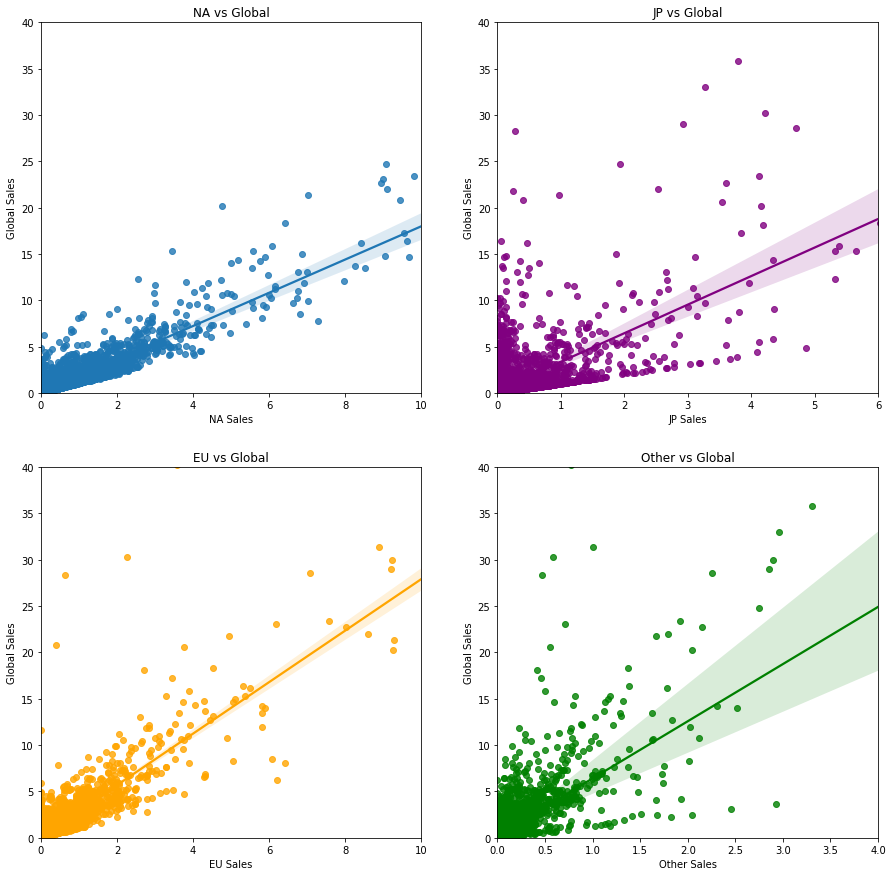

In [22]:
fig = plt.figure(figsize = (15, 15))
axes1 = fig.add_subplot(2, 2, 1)
sns.regplot(sales.NA_Sales, sales.Global_Sales, ax = axes1)
axes1.set(**{
    'title': 'NA vs Global',
    'xlabel': 'NA Sales',
    'ylabel': 'Global Sales',
    'xlim': [0, 10],
    'ylim': [0, 40]
})

axes2 = fig.add_subplot(2, 2, 2)
sns.regplot(sales.JP_Sales, sales.Global_Sales, ax = axes2, color = 'purple')
axes2.set(**{
    'title': 'JP vs Global',
    'xlabel': 'JP Sales',
    'ylabel': 'Global Sales',
    'xlim': [0, 6],
    'ylim': [0, 40]
})

axes3 = fig.add_subplot(2, 2, 3)
sns.regplot(sales.EU_Sales, sales.Global_Sales, ax = axes3, color = 'orange')
axes3.set(**{
    'title': 'EU vs Global',
    'xlabel': 'EU Sales',
    'ylabel': 'Global Sales',
    'xlim': [0, 10],
    'ylim': [0, 40]
})

axes4 = fig.add_subplot(2, 2, 4)
sns.regplot(sales.Other_Sales, sales.Global_Sales, ax = axes4, color = 'green')
axes4.set(**{
    'title': 'Other vs Global',
    'xlabel': 'Other Sales',
    'ylabel': 'Global Sales',
    'xlim': [0, 4],
    'ylim': [0, 40]
})

### A Basic Linear Regression Model  

Based on the heatmap and regression plots as above, the following linear regression model uses feature genre, and North America sales to predict the global sales of the the game.

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [24]:
y = sales.Global_Sales

In [25]:
X = sales.loc[:, ['Genre', 'NA_Sales']]

In [26]:
X.Genre = pd.Categorical(X.Genre).codes

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

In [28]:
lreg = LinearRegression().fit(X_train, y_train)

In [29]:
pred = lreg.predict(X_test)

In [30]:
mean_squared_error(y_test, pred)

0.25932368141937745